# CS 6220 Homework 1 -- Xinan Wang

In [112]:
import pandas as pd
import numpy as np 

In [113]:
data = pd.read_csv('movie_lens_genre_separated.tsv', sep='\t')

In [114]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [115]:
data.shape

(2101845, 10)

#### 1. An aggregate (e.g., average) of the movie ratings for each particular genre.

In [281]:
# Remove the duplicates data of the same timestamp for the same title
# So that 1 timestamp with same title movie will only be recorded as 1 rate
average_rating = data.groupby(['occupation','genres','timestamp','title'])['rating'].agg(rating_average = 'mean')

# Use groupby method to find the average of the movie ratings for each particular genre
average_rating = average_rating.groupby('genres')['rating_average'].mean()
average_rating

genres
Action         3.491183
Adventure      3.477257
Animation      3.684868
Children's     3.422035
Comedy         3.522099
Crime          3.708679
Documentary    3.933123
Drama          3.766332
Fantasy        3.447371
Film-Noir      4.075188
Horror         3.215016
Musical        3.665511
Mystery        3.668102
Romance        3.607462
Sci-Fi         3.466521
Thriller       3.570464
War            3.893327
Western        3.637770
Name: rating_average, dtype: float64

#### 2. The top 5 highest ranked genre by occupation.

In [117]:
occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

In [118]:
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [274]:
# Remove the duplicates data of the same timestamp for the same title
# So that 1 timestamp with same title movie will only be recorded as 1 rate

average_occupation = data.groupby(['occupation','genres','timestamp','title'])['rating'].agg(rating_average = 'mean')

# Find each genres average rating by occupation
average_occupation = average_occupation.groupby(['occupation','genres'])['rating_average'].agg(rating_avg = 'mean')
average_occupation

rating_avg
occupation   genres                
K-12 student Action        3.497116
             Adventure     3.425658
             Animation     3.463956
             Children's    3.220679
             Comedy        3.497200
...                             ...
writer       Romance       3.469602
             Sci-Fi        3.390184
             Thriller      3.461494
             War           3.798393
             Western       3.618467

[378 rows x 1 columns]

In [275]:
# Find the top 5 highest average rating score movie by each occupation

average_occupation.sort_values(['occupation','rating_avg'],ascending = False).groupby(['occupation']).head(5)

rating_avg
occupation   genres                 
writer       Film-Noir      4.104603
             Documentary    3.967914
             War            3.798393
             Animation      3.699773
             Musical        3.669728
...                              ...
K-12 student Film-Noir      4.212766
             War            3.880144
             Drama          3.782167
             Crime          3.687085
             Mystery        3.636612

[105 rows x 1 columns]

#### 3. The most popular (with most ratings) movie by age group.

In [308]:
age_dict = {
    1:  "0-18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [309]:
data['age_group'] = [age_dict[x] for x in data['age']]

In [311]:
# Remove the duplicates data of the same timestamp for the same title
# So that 1 timestamp with same title movie will only be recorded as 1 rate
popular_movie = data.groupby(['age_group','title'])['timestamp'].agg(rate_count = 'nunique')

# Get the most popular movie title inside each age group
popular_movie.sort_values(['age_group', 'rate_count'],ascending = False).groupby('age_group').head(1)

,,rate_count
age_group,title,
56+,American Beauty (1999),184
50-55,American Beauty (1999),248
45-49,American Beauty (1999),258
35-44,Star Wars: Episode IV - A New Hope (1977),626
25-34,American Beauty (1999),1333
18-24,American Beauty (1999),715
0-18,Toy Story (1995),112


#### 4. A breakdown of a movie’s ratings by occupation, using any movie of your choice.

The movie I chose for analyzing is 'Star Wars: Episode V - The Empire Strikes Back(1980)'

In [312]:
movie = 'American Beauty (1999)'

rating_occupation = data[data['title'] == movie].groupby(['occupation','timestamp'])['rating'].agg(rating_value = 'mean')
rating_occupation = rating_occupation.groupby(['occupation','rating_value'])['rating_value'].agg(rating_count = 'count')
rating_occupation

rating_count
occupation   rating_value              
K-12 student 1.0                      3
             2.0                      2
             3.0                      9
             4.0                     12
             5.0                     51
...                                 ...
writer       1.0                      2
             2.0                      9
             3.0                     18
             4.0                     45
             5.0                    107

[100 rows x 1 columns]

#### 5. A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [285]:
def user_information(user_id):
    
    user_data = data[data['user_id'] == user_id]
    
    age = user_data['age'].iloc[0]
    occupation = user_data['occupation'].iloc[0]
    average_rating = user_data.groupby(['timestamp','title'])['rating'].agg(rating_avg = 'mean')
    avg_rating = average_rating['rating_avg'].mean()
    highest_rating = user_data['rating'].max()
    highest_title = user_data[user_data['rating'] == highest_rating]['title'].unique()
    lowest_rating = user_data['rating'].min()
    lowest_title = user_data[user_data['rating'] == lowest_rating]['title'].unique()
    
    highest = []
    lowest = []
    
    for i in highest_title:
        highest.append(i)
    for j in lowest_title:
        lowest.append(j)
    
    return_value = '(1) The user age is ' + str(age) + '. The occupation of this user is: ' + str(occupation) + '. (2) The average rating given by this user is: ' + str(round(avg_rating,4)) +'. (3) His highest rated movie(s) is(are): ' + ', '.join(highest) + '. His lowest rated movie(s) is(are): ' + ', '.join(lowest)
    
    return return_value

In [286]:
# Test case

user_information(2917)

'(1) The user age is 25. The occupation of this user is: not specified. (2) The average rating given by this user is: 3.5286. (3) His highest rated movie(s) is(are): Fargo (1996), Raiders of the Lost Ark (1981), Pulp Fiction (1994), Crumb (1994), North by Northwest (1959), Hard-Boiled (Lashou shentan) (1992), Rear Window (1954), Citizen Kane (1941), Blade Runner (1982), Annie Hall (1977), Vertigo (1958), Killer, The (Die xue shuang xiong) (1989), Strangers on a Train (1951), City Lights (1931), Raging Bull (1980), Fandango (1985), Paradise Lost: The Child Murders at Robin Hood Hills (1996). His lowest rated movie(s) is(are): Arachnophobia (1990), Entrapment (1999)'

#### 6. Some other statistic, chart/visualization, data aggregation, or figure that you created using this dataset, along with a short description of what interesting observations you derived from it

In [292]:
import matplotlib.pyplot as plt

In [313]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group
0,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Animation,25-34
1,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Children's,25-34
2,2917,2355,2,971730180,M,25,not specified,60201,"Bug's Life, A (1998)",Comedy,25-34
3,2924,2355,4,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",Animation,18-24
4,2924,2355,4,971592069,F,18,college/grad student,94121,"Bug's Life, A (1998)",Children's,18-24


##### Visualize the total number of rating by each age_group

In [327]:
# Remove the duplicates data of the same timestamp for the same title
# So that 1 timestamp with same title movie will only be recorded as 1 rate
rating = data.groupby(['age_group','gender'])['timestamp'].agg(rating_count = 'nunique')
rating

rating_count
age_group gender              
0-18      F               4938
          M              10011
18-24     F              24550
          M              68465
25-34     F              44805
          M             140146
35-44     F              24385
          M              66896
45-49     F              11209
          M              24584
50-55     F               8208
          M              23405
56+       F               4352
          M              13125

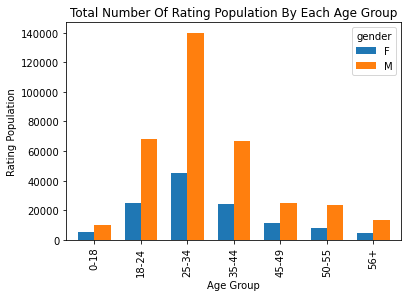

In [348]:
rating['rating_count'].unstack().plot.bar(width = 0.7)
plt.xlabel('Age Group')
plt.ylabel('Rating Population')
plt.title('Total Number Of Rating Population By Each Age Group')

plt.show()

From this visualization plot, we can clearly see that the male movie rating population is greatly larger than the population of female. Especially for the 25 - 34 age group, the male population is about 140k, while the female rating population is just around 50k. This is a very large difference between gender. And for the other age groups, the difference is also significant, and male movie rating population always larger than the female movie rating population. So, we can conclude that compared to female group, male group are more likely to rate the movies.

And from the age group population distribution, we can clearly see that the most active age group to rate is 25 - 34 age group because they have the largest population of movie rating. 18 - 24 and 35 - 44 age groups have similar population of rating movies. And they are the top 2 and top 3 largest rating age group. The age group 0-18 and 56+ are the most inactive movie rating age group because they have the smallest rating population.

##### Visualize the rating percentage of each genres

In [384]:
# Remove the duplicates data of the same timestamp for the same title
# So that 1 timestamp with same title movie will only be recorded as 1 rate
rating_genres = data.groupby(['genres'])['timestamp'].agg(rating_count = 'nunique')
rating_genres = rating_genres.sort_values(['rating_count'],ascending = False)
rating_genres

,rating_count
genres,
Drama,236286
Comedy,226599
Action,151918
Thriller,133701
Romance,115945
Sci-Fi,98602
Adventure,95343
Crime,63963
War,56056


In [385]:
genres_percentage = rating_genres / rating_genres.sum()
genres_percentage

,rating_count
genres,
Drama,0.163503
Comedy,0.156800
Action,0.105123
Thriller,0.092517
Romance,0.080230
Sci-Fi,0.068230
Adventure,0.065975
Crime,0.044260
War,0.038789


Text(0.5, 1.0, 'Rating Percentage Of Each Genres')

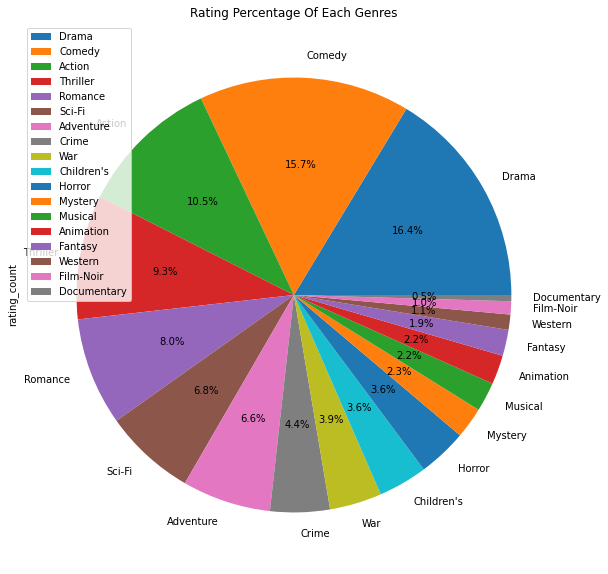

In [387]:
genres_percentage.plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize = (10,10))

plt.title('Rating Percentage Of Each Genres')

From this pie chart output, we can find that the top 5 most popular genres are Drama, Comedy, Action, Thriller, and Romance. And Drama has taken 16.4% rates of the total genres. Comedy has taken 15.7%, Action has taken 10.5%. Therefore, Drama, Comedy and Action are the only 3 genres that taken above 10% rates of the total genres. Beside these 3 most popular genres on rating, Thriller, Romance, Sci-Fi and Adventure are also popular because they are the only genres that take above 5% rates of the total genres. Documentary, Film-Noir and Western are to least 3 popular genres of the total rates.